In [1]:
# dataset comes from kaggle website 
# https://www.kaggle.com/sakshigoyal7/credit-card-customers

# The dataset consists of over 10000 rows describing bank's clients. 
# The business aim is to predict which clients are gonna to resign from the credit card. 
# Then the bank can avoid it and ensure having better churn rate.
# Top priority in this business problem is to identify customers who are getting churned.

In [2]:
# Months_on_book - Months on book (Time of Relationship)
# Dependent_count: number of people uses that specific account;
# Total_Relationship_Count - Total no. of products held by the customer
# Months_Inactive_12_mon - No. of months inactive in the last 12 months
# Contacts_Count_12_mon - No. of Contacts in the last 12 months
# Credit_Limit - Credit Limit on the Credit Card
# Total_Revolving_Bal - Total Revolving Balance on the Credit Card
# Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
# Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
# Total_Trans_Amt - Total Transaction Amount (Last 12 months)
# Total_Trans_Ct - Total Transaction Count (Last 12 months)
# Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
# Avg_Utilization_Ratio - Average Card Utilization Ratio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [5]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [6]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [7]:
# grid search
# randomize search
# standaryzacja - MinMax Scaler, StandardScaler
# regresja logistyczna, SVC, drzewo decyzyjne, las losowy, XGBoost
# metrics, cross_val_score
# pipeline 
# RandomOverSampler, SMOTE
# feature selection - SelectFromModel
# crosswalidacja

In [8]:
data=pd.read_csv(r'C:\Users\pawel\Desktop\kurs DS\BankChurners\BankChurners.csv')

In [9]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [10]:
# the last two columns can be removed - they were added as a result of previous analysis

In [11]:
data=data.iloc[:,:-2]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
# there are not any null values. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
# checking if there are more than one observation for a client
data[data['CLIENTNUM'].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [14]:
# unique number for the client can be removed, we cannot predict anything based on that information
data.drop('CLIENTNUM', axis=1, inplace=True)

In [15]:
data.describe(include='all')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [16]:
# I am splitting data into categorical and numerical
cat=data.select_dtypes(exclude=np.number).columns.to_list()
num=data.select_dtypes(include=np.number).columns.to_list()

Categorical variable: Attrition_Flag
['Existing Customer' 'Attrited Customer']


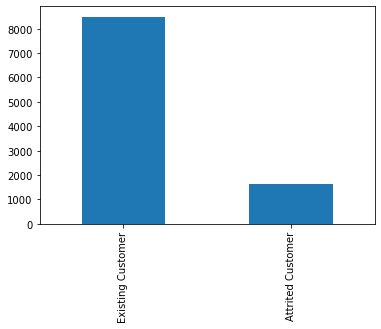

Categorical variable: Gender
['M' 'F']


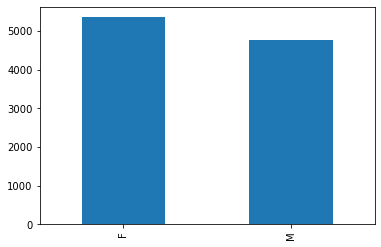

Categorical variable: Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


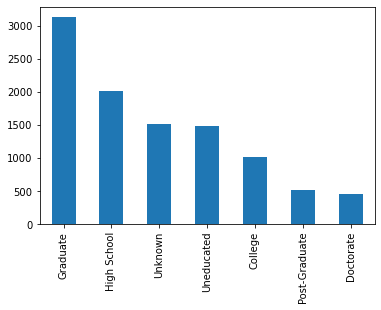

Categorical variable: Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']


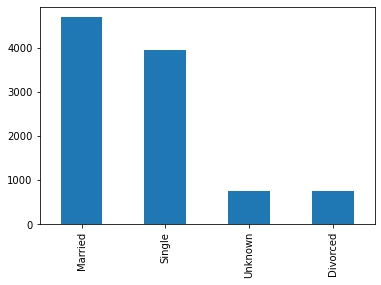

Categorical variable: Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


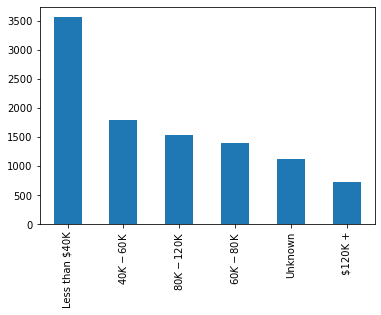

Categorical variable: Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']


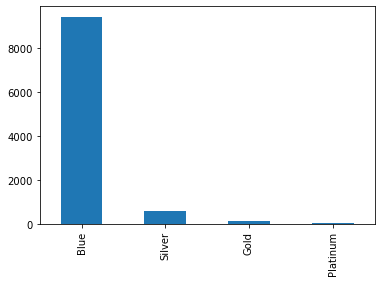

In [17]:
# I am checking distribution and unique values for categorical columns
for name in cat:
    print(f'Categorical variable: {name}')
    print(data[name].unique())
    data[name].value_counts().plot.bar()
    plt.show()

In [18]:
# I am checking the distribution of numerical data

Numerical variable: Customer_Age


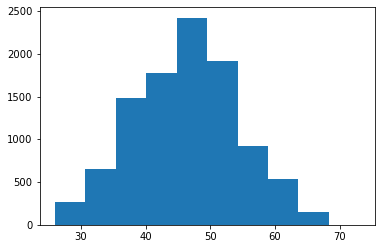

Numerical variable: Dependent_count


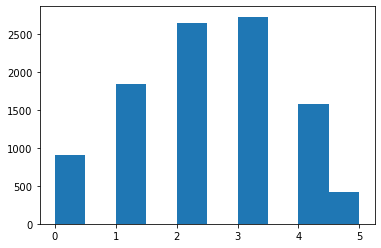

Numerical variable: Months_on_book


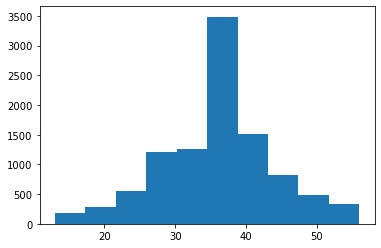

Numerical variable: Total_Relationship_Count


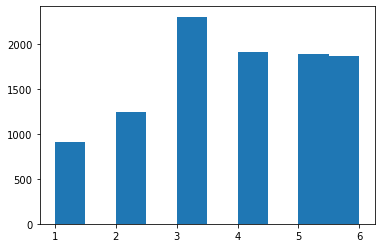

Numerical variable: Months_Inactive_12_mon


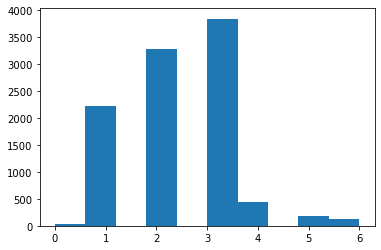

Numerical variable: Contacts_Count_12_mon


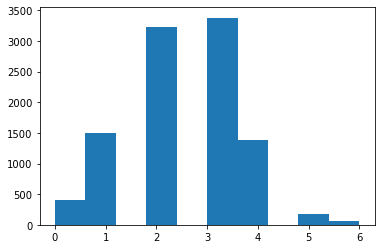

Numerical variable: Credit_Limit


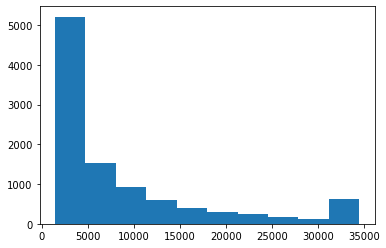

Numerical variable: Total_Revolving_Bal


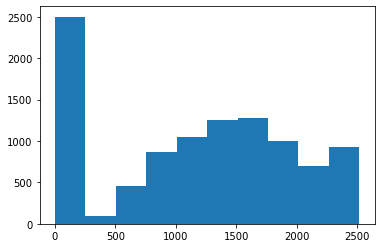

Numerical variable: Avg_Open_To_Buy


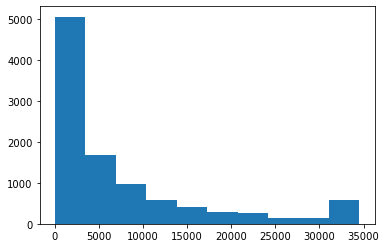

Numerical variable: Total_Amt_Chng_Q4_Q1


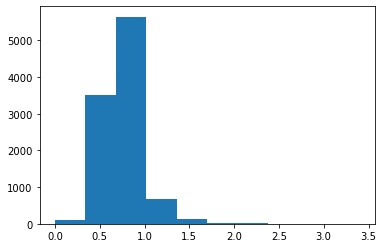

Numerical variable: Total_Trans_Amt


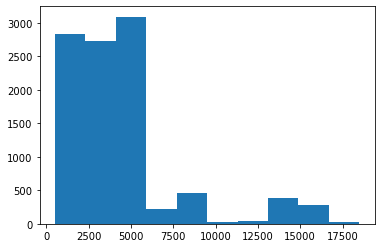

Numerical variable: Total_Trans_Ct


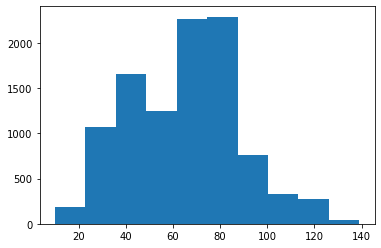

Numerical variable: Total_Ct_Chng_Q4_Q1


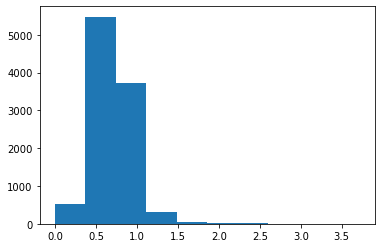

Numerical variable: Avg_Utilization_Ratio


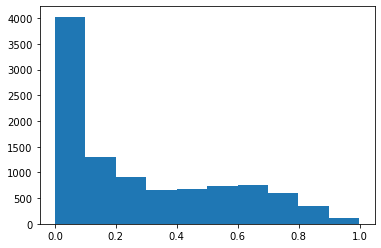

In [19]:
for name in num:
    print(f'Numerical variable: {name}')
    plt.hist(data[name])
    plt.show()

In [20]:
# data are imbalanced
data['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [21]:
# replacing text information with binary data
data['Attrition_Flag']=data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

In [22]:
data['Gender']=data['Gender'].map({'F':0, 'M':1})

In [23]:
# splitting data into features and target

In [24]:
X=data.drop('Attrition_Flag', axis=1)
y=data['Attrition_Flag']

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [26]:
# splitting data into training and test
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y)

In [27]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8256,33,0,1,Uneducated,Married,Less than $40K,Blue,23,2,2,3,1830.0,1777,53.0,0.639,5271,76,0.854,0.971
5176,40,1,4,Graduate,Married,$80K - $120K,Blue,36,3,3,2,2165.0,1465,700.0,0.622,3672,64,0.730,0.677
7259,56,0,2,Graduate,Married,Unknown,Blue,36,6,2,3,2015.0,807,1208.0,0.831,5209,76,0.767,0.400
1932,34,1,2,Graduate,Married,$120K +,Blue,28,4,3,3,13384.0,1853,11531.0,0.807,1899,33,0.833,0.138
7771,57,0,1,High School,Married,Less than $40K,Blue,50,3,2,2,1609.0,0,1609.0,0.669,4770,85,0.700,0.000


In [28]:
y_test.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

In [29]:
# target in train and test data have the same distribution
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: Attrition_Flag, dtype: float64

In [30]:
# I determine the baseline - two basic models without any parametrization and further feature engineering

In [31]:
# encoding for categorical variables
X_train_b=pd.get_dummies(X_train)
X_test_b=pd.get_dummies(X_test)

In [32]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_b, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
predicted=dt.predict(X_test_b)

In [34]:
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.932872655478776
0.7630769230769231
0.8078175895765473
0.7848101265822786


In [35]:
lr=LogisticRegression(solver="liblinear")
lr.fit(X_train_b, y_train)

LogisticRegression(solver='liblinear')

In [36]:
predicted=lr.predict(X_test_b)

In [37]:
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.8958538993089832
0.5107692307692308
0.7614678899082569
0.6114180478821363


In [38]:
# Decision tree looks quite nice. 
# In our case recall is more important. I will put more effort to improve that rate 

In [39]:
X_train.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.356499,0.472164,2.335267,35.927540,3.824096,2.337242,2.460067,8576.384829,1165.639180,7410.745649,0.761583,4391.490310,64.756820,0.712080,0.275695
std,8.024103,0.499255,1.298024,8.020871,1.560165,1.013529,1.102877,9040.625383,816.252588,9040.535151,0.221019,3375.997022,23.412672,0.237543,0.275493
min,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2544.000000,351.000000,1321.000000,0.631000,2153.000000,45.000000,0.581000,0.023000
50%,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4546.000000,1280.000000,3439.000000,0.738000,3897.000000,67.000000,0.700000,0.178000
75%,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10961.000000,1791.000000,9741.000000,0.861000,4740.000000,81.000000,0.818000,0.505000
max,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.571000,0.999000


In [40]:
# check for outliers for some of columns
melted = pd.melt(X_train, value_vars=X_train[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']].columns, var_name=['feature_name'], value_name = 'value')

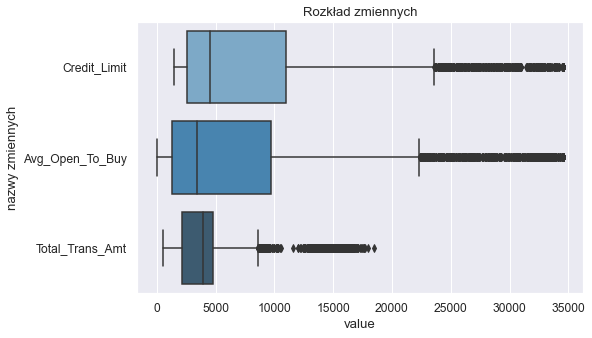

In [41]:
# Boxplot shows many outliers, anyhow I think they are normal values
plt.figure(figsize=(8,5))
sns.set(font_scale=1.1)
sns.boxplot(data = melted, y = 'feature_name', x = 'value', palette = 'Blues_d').set(title = 'Rozkład zmiennych', ylabel = 'nazwy zmiennych')
plt.show()

In [42]:
sigma = X_train.std()
mean = X_train.mean()

In [43]:
low_boundary = (mean - 3 * sigma)
upp_boundary = (mean + 3 * sigma)
num_of_outliers_L = (X_train < low_boundary).sum()
num_of_outliers_U = (X_train > upp_boundary).sum()
outliers_3sigma = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

In [44]:
# I will not remove any outliers. Looking at data it seems they are due to high skewness of the data, but I think they are possible
outliers_3sigma

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
Avg_Open_To_Buy,-19710.859803,34532.351100,0,0
Avg_Utilization_Ratio,-0.550783,1.102174,0,0
Card_Category,NaN,NaN,0,0
Contacts_Count_12_mon,-0.848564,5.768697,0,42
Credit_Limit,-18545.491319,35698.260977,0,0
Customer_Age,22.284191,70.428808,0,1
Dependent_count,-1.558804,6.229339,0,0
Education_Level,NaN,NaN,0,0
Gender,-1.025602,1.969930,0,0
Income_Category,NaN,NaN,0,0


In [45]:
# Feature engineering

In [46]:
X_train['Education_Level'].unique()

array(['Uneducated', 'Graduate', 'High School', 'College', 'Unknown',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [47]:
pd.crosstab(X_train['Education_Level'], y_train).apply(lambda r: r/r.sum(), axis=1)

Attrition_Flag,0,1
Education_Level,,
College,0.841584,0.158416
Doctorate,0.781768,0.218232
Graduate,0.844828,0.155172
High School,0.845721,0.154279
Post-Graduate,0.836879,0.163121
Uneducated,0.846154,0.153846
Unknown,0.829268,0.170732


In [48]:
# I am assigning values to the education level based on number of years needed to complete the education
slownik={'Graduate':3, 'College':2, 'Post-Graduate':4, 'Doctorate':5, 
         'Uneducated':0, 'Unknown':-1, 'High School':1}

In [49]:
X_train['Education_Level']=X_train['Education_Level'].map(slownik)

<ipython-input-49-fe7bf188b209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Education_Level']=X_train['Education_Level'].map(slownik)


In [50]:
def map_education(X):
    slownik={'Graduate':3, 'College':2, 'Post-Graduate':4, 'Doctorate':5, 
         'Uneducated':0, 'Unknown':-1, 'High School':1}
    X['Education_Level']=X['Education_Level'].map(slownik) 

In [51]:
X_train['Education_Level'].value_counts()

 3    2494
 1    1601
-1    1230
 0    1183
 2     808
 4     423
 5     362
Name: Education_Level, dtype: int64

In [52]:
pd.crosstab(X_train['Marital_Status'], y_train).apply(lambda r: r/r.sum(), axis=1)

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.846667,0.153333
Married,0.848047,0.151953
Single,0.827838,0.172162
Unknown,0.837438,0.162562


In [53]:
# I didiving Marital status into married and all other 
X_train['Marital_Status']=X_train['Marital_Status'].apply(lambda x: 1 if x=='Married' else 0)

<ipython-input-53-1be06cd54d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Marital_Status']=X_train['Marital_Status'].apply(lambda x: 1 if x=='Married' else 0)


In [54]:
def map_marital_status(X):
    X['Marital_Status']=X['Marital_Status'].apply(lambda x: 1 if x=='Married' else 0)

In [55]:
pd.crosstab(X_train['Income_Category'], y_train).apply(lambda r: r/r.sum(), axis=1)

Attrition_Flag,0,1
Income_Category,,
$120K +,0.836120,0.163880
$40K - $60K,0.839001,0.160999
$60K - $80K,0.866184,0.133816
$80K - $120K,0.849010,0.150990
Less than $40K,0.829054,0.170946
Unknown,0.827969,0.172031


In [56]:
X_train['Income_Category'].unique()

array(['Less than $40K', '$80K - $120K', 'Unknown', '$120K +',
       '$60K - $80K', '$40K - $60K'], dtype=object)

In [57]:
# I am assigning values to the income category - the higher income, the bigger value
X_train.loc[:,'Income_Category']=X_train.loc[:,'Income_Category'].replace({'Unknown':-1, '$40K - $60K':1, '$60K - $80K':2,
                                                        '$80K - $120K':3, '$120K +':4, 'Less than $40K':0})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
def map_income_category(X):
        X.loc[:,'Income_Category']=X.loc[:,'Income_Category'].replace({'Unknown':-1, '$40K - $60K':1, '$60K - $80K':2, 
                                        '$80K - $120K':3, '$120K +':4, 'Less than $40K':0})

In [59]:
X_train['Income_Category'].value_counts()

 0    2843
 1    1441
 3    1212
 2    1106
-1     901
 4     598
Name: Income_Category, dtype: int64

In [60]:
pd.crosstab(X_train['Card_Category'], y_train).apply(lambda r: r/r.sum(), axis=1)

Attrition_Flag,0,1
Card_Category,,
Blue,0.838620,0.161380
Gold,0.811765,0.188235
Platinum,0.857143,0.142857
Silver,0.855505,0.144495


In [61]:
# Most of cards are "blue". I will distinguish obly two groups - blue and all other as they have very small representation
X_train['Card_Category']=X_train['Card_Category'].apply(lambda x: 0 if x=='Blue' else 1)

<ipython-input-61-e75e5f6ee1be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Card_Category']=X_train['Card_Category'].apply(lambda x: 0 if x=='Blue' else 1)


In [62]:
def map_card_category(X):
    X['Card_Category']=X['Card_Category'].apply(lambda x: 0 if x=='Blue' else 1) 

In [63]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8256,33,0,1,0,1,0,0,23,2,2,3,1830.0,1777,53.0,0.639,5271,76,0.854,0.971
5176,40,1,4,3,1,3,0,36,3,3,2,2165.0,1465,700.0,0.622,3672,64,0.730,0.677
7259,56,0,2,3,1,-1,0,36,6,2,3,2015.0,807,1208.0,0.831,5209,76,0.767,0.400
1932,34,1,2,3,1,4,0,28,4,3,3,13384.0,1853,11531.0,0.807,1899,33,0.833,0.138
7771,57,0,1,1,1,0,0,50,3,2,2,1609.0,0,1609.0,0.669,4770,85,0.700,0.000


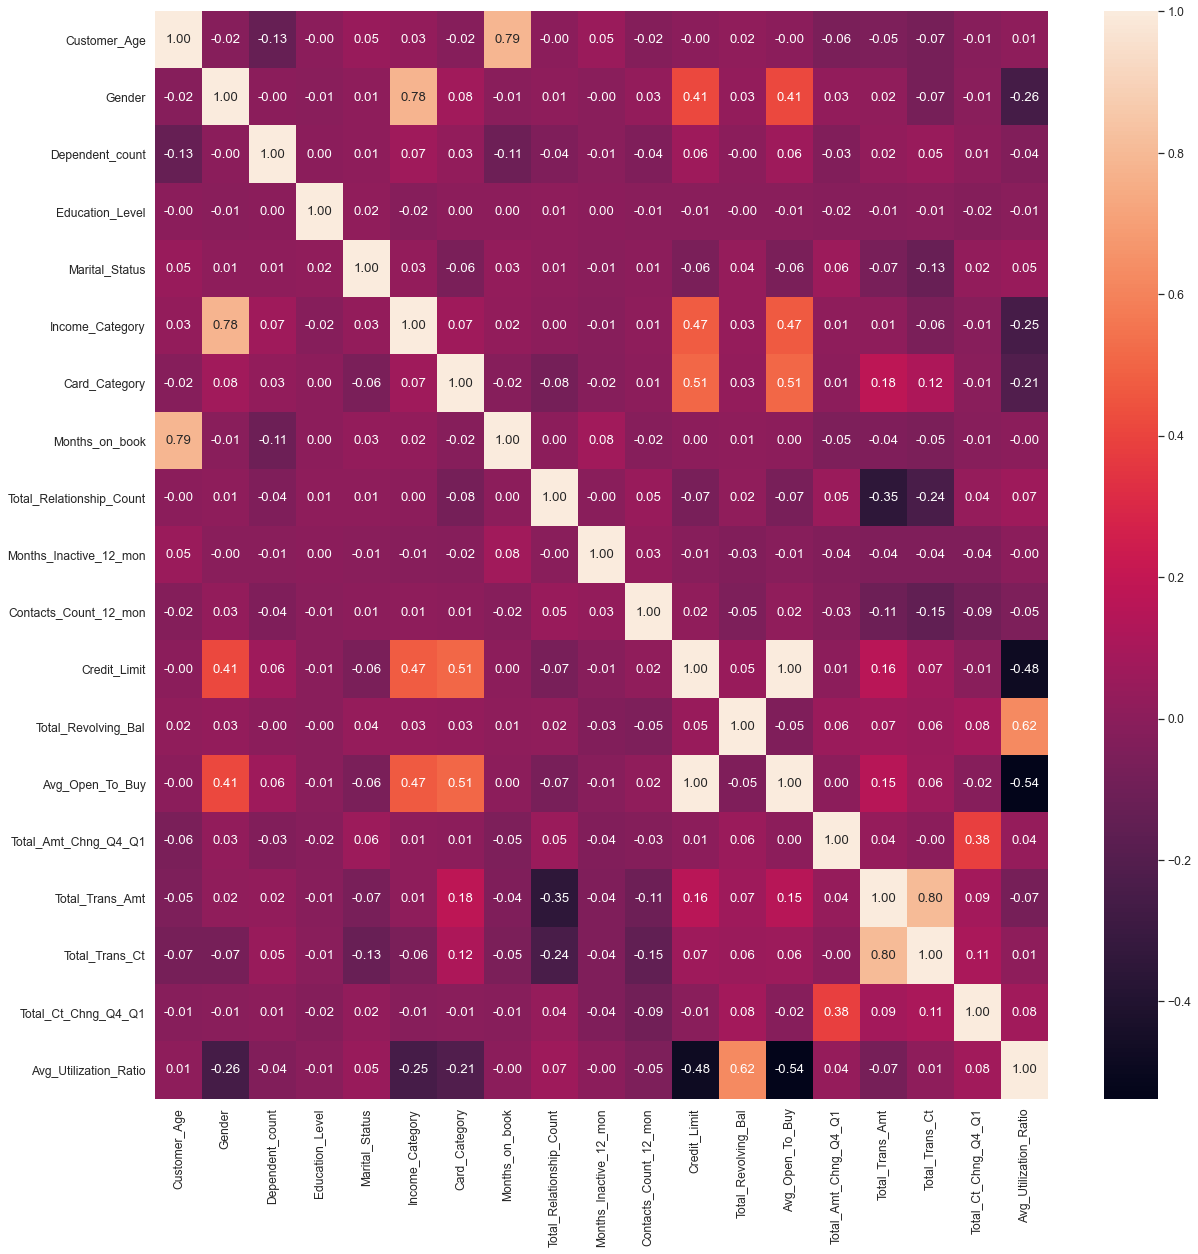

In [64]:
# I am checking correlaction between features
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')

In [65]:
# we have some very highly correlated data. I will use some techniques to remove dimensionality
# data.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [66]:
map_card_category(X_test)
map_marital_status(X_test)
map_education(X_test)
map_income_category(X_test)

<ipython-input-62-21b5e3c490c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Card_Category']=X['Card_Category'].apply(lambda x: 0 if x=='Blue' else 1)
<ipython-input-50-9d1bb7acbb71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education_Level']=X['Education_Level'].map(slownik)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [67]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8256,33,0,1,0,1,0,0,23,2,2,3,1830.0,1777,53.0,0.639,5271,76,0.854,0.971
5176,40,1,4,3,1,3,0,36,3,3,2,2165.0,1465,700.0,0.622,3672,64,0.730,0.677
7259,56,0,2,3,1,-1,0,36,6,2,3,2015.0,807,1208.0,0.831,5209,76,0.767,0.400
1932,34,1,2,3,1,4,0,28,4,3,3,13384.0,1853,11531.0,0.807,1899,33,0.833,0.138
7771,57,0,1,1,1,0,0,50,3,2,2,1609.0,0,1609.0,0.669,4770,85,0.700,0.000


In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
predicted=dt.predict(X_test)

In [71]:
# small imporevement visible
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.932872655478776
0.7692307692307693
0.8038585209003215
0.7861635220125788


In [72]:
# DT baseline
# 0.937314906219151
# 0.7876923076923077
# 0.8152866242038217
# 0.8012519561815337

In [73]:
X_train.describe()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.356499,0.472164,2.335267,1.601160,0.461425,1.083817,0.066041,35.927540,3.824096,2.337242,2.460067,8576.384829,1165.639180,7410.745649,0.761583,4391.490310,64.756820,0.712080,0.275695
std,8.024103,0.499255,1.298024,1.705414,0.498540,1.479326,0.248369,8.020871,1.560165,1.013529,1.102877,9040.625383,816.252588,9040.535151,0.221019,3375.997022,23.412672,0.237543,0.275493
min,26.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2544.000000,351.000000,1321.000000,0.631000,2153.000000,45.000000,0.581000,0.023000
50%,46.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4546.000000,1280.000000,3439.000000,0.738000,3897.000000,67.000000,0.700000,0.178000
75%,52.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,40.000000,5.000000,3.000000,3.000000,10961.000000,1791.000000,9741.000000,0.861000,4740.000000,81.000000,0.818000,0.505000
max,73.000000,1.000000,5.000000,5.000000,1.000000,4.000000,1.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.571000,0.999000


In [74]:
# I want to choose one classifier for further parameterization 
# I am changing scoring to "recall"
models = [LogisticRegression(random_state=42), LinearSVC(random_state=42), 
          SVC(random_state=42), DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(random_state=42), XGBClassifier(random_state=42)]
names = ['LR', 'lSVC', 'SVC', 'DT', 'RF', 'XGB']

basic_acc = {}
for m, n in zip(models, names):
    basic_acc[n] = cross_val_score(m,X_train,y_train,cv=10, scoring='recall').mean()
    predicted=dt.predict(X_test)
    f1_score(y_test, predicted)
print(basic_acc)    

{'LR': 0.4707633587786259, 'lSVC': 0.590886670581327, 'SVC': 0.0, 'DT': 0.7826600117439811, 'RF': 0.8295361127422197, 'XGB': 0.8517909571344686}


In [75]:
# standarization was required for SVM models. Anyhow, they have worst performance that DT, RF, XGB
svm=make_pipeline(StandardScaler(), SVC(random_state=42))
svml=make_pipeline(StandardScaler(), LinearSVC(random_state=42))
print(cross_val_score(svm,X_train,y_train,cv=10, scoring='recall').mean())
print(cross_val_score(svml,X_train,y_train,cv=10, scoring='recall').mean())

0.682795067527892
0.5791192014092778


In [76]:
# 3 modeles are promising. I will choose the best one based on roc_auc_score and F1 score
results={}
for m, n in zip(models, names):
    if n in ('DT', 'RF', 'XGB'):
        subresults=[]
        m.fit(X_train, y_train)
        preds = m.predict(X_test)
        subresults.append(f1_score(y_test, preds))
        proba_preds = m.predict_proba(X_test)
        subresults.append(roc_auc_score(y_test, proba_preds[:, 1]))
        results[n]=subresults

In [77]:
r=pd.DataFrame(results).T
r.columns =['f1_score', 'roc_auc_score']

In [78]:
# both RF and XGB have similar performance. I will focus on Random Forest parametrization
r

,f1_score,roc_auc_score
DT,0.786164,0.866685
RF,0.868552,0.988296
XGB,0.872910,0.990565


In [79]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [80]:
?mutual_info_classif

In [81]:
# I will check if the reduction of features can improve performance of model
pipeline = make_pipeline(StandardScaler(), SelectKBest(mutual_info_classif, 15),
                          RandomForestClassifier(random_state=42))

In [82]:
cross_val_score(pipeline, X_train, y_train, cv=10, scoring='recall').mean()

0.8248737522019963

In [83]:
pipeline.fit(X_train, y_train)
predicted=pipeline.predict(X_test)

In [84]:
# I have received better results thanks to reduction of variables
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9580454096742349
0.7938461538461539
0.9347826086956522
0.8585690515806987


In [85]:
pipeline=Pipeline([('scaler', StandardScaler()), 
                   ('KBest', SelectKBest(mutual_info_classif, 15)), 
                   ('RF', RandomForestClassifier(random_state=42, n_estimators=20))])

In [86]:
parametry={"KBest__k": [10,12,15],
    "RF__criterion": ["gini", "entropy"],
    "RF__min_samples_split": [2,4,5,6,8],
    "RF__class_weight":[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}, 'balanced'],
    "RF__min_samples_leaf":[1,2,5]}

In [87]:
gs = GridSearchCV(pipeline, parametry, cv=5, scoring='recall', verbose=1, n_jobs=3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   36.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  5.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  9.9min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed: 15.4min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed: 22.1min
[Parallel(n_jobs=3)]: Done 2250 out of 2250 | elapsed: 27.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KBest',
                                        SelectKBest(k=15,
                                                    score_func=<function mutual_info_classif at 0x000001DC38C3AE50>)),
                                       ('RF',
                                        RandomForestClassifier(n_estimators=20,
                                                               random_state=42))]),
             n_jobs=3,
             param_grid={'KBest__k': [10, 12, 15],
                         'RF__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                              {0: 1, 1: 3}, {0: 1, 1: 4},
                                              'balanced'],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__min_samples_leaf': [1, 2, 5],
                         'RF__min_samples_split': [2, 4, 5, 6, 8]},
    

In [88]:
gs.best_score_

0.9055526083112291

In [91]:
gs.best_params_

{'KBest__k': 10,
 'RF__class_weight': 'balanced',
 'RF__criterion': 'gini',
 'RF__min_samples_leaf': 5,
 'RF__min_samples_split': 6}

In [92]:
model=Pipeline([('scaler', StandardScaler()), 
                ('KBest', SelectKBest(mutual_info_classif, 10)), 
                ('RF', RandomForestClassifier(random_state=42, class_weight='balanced', 
                                              criterion='gini', min_samples_leaf=5, 
                                              min_samples_split=6))])

model.fit(X_train, y_train)
predicted=model.predict(X_test)

In [93]:
# result improved
cross_val_score(model, X_train, y_train, cv=10, scoring='recall').mean()

0.903270698766882

In [94]:
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9540967423494571
0.8830769230769231
0.8391812865497076
0.8605697151424287


In [95]:
parametry2={"RF__bootstrap":[True, False],
    "RF__max_samples": [None, 500, 1000],
    "RF__max_features": ["auto", "sqrt", 8]}

In [96]:
# I want to check other parameters in the second round of parameterizing
gs = GridSearchCV(model, parametry2, cv=5, scoring='recall', verbose=1, n_jobs=3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   44.8s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x000001DC38C3AE50>)),
                                       ('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               min_samples_leaf=5,
                                                               min_samples_split=6,
                                                               random_state=42))]),
             n_jobs=3,
             param_grid={'RF__bootstrap': [True, False],
                         'RF__max_features': ['auto', 'sqrt', 8],
                         'RF__max_samples': [None, 500, 1000]},
             scoring='recall', verbose=1)

In [97]:
gs.best_params_

{'RF__bootstrap': False, 'RF__max_features': 'auto', 'RF__max_samples': None}

In [98]:
model=Pipeline([('scaler', StandardScaler()), 
                ('KBest', SelectKBest(mutual_info_classif, 10)), 
                ('RF', RandomForestClassifier(random_state=42, class_weight='balanced', 
                                              criterion='gini', max_features='auto',
                                              min_samples_leaf=5, min_samples_split=6,
                                              bootstrap=False, max_samples=None))])

model.fit(X_train, y_train)
predicted=model.predict(X_test)

In [99]:
# result improved
cross_val_score(model, X_train, y_train, cv=10, scoring='recall').mean()

0.9170698766881973

In [100]:
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9526159921026653
0.88
0.8338192419825073
0.8562874251497006


In [101]:
RF_pkl_filename = r'C:\Users\pawel\Desktop\kurs DS\RF_classifier_20210302.pkl'
# RF_model_pkl = open(RF_pkl_filename, 'wb')
# pickle.dump(model, RF_model_pkl)
# RF_model_pkl.close()

In [102]:
RF_model_pkl = open(RF_pkl_filename, 'rb')
RF_model = pickle.load(RF_model_pkl)

In [ ]:
RF_model

In [ ]:
predicted=gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA()
# PCA wymaga standaryzacji zmiennych
X_sc=pca.fit_transform(X_sc)

In [ ]:
explained_variance=pca.explained_variance_ratio_
plt.plot(explained_variance)

In [ ]:
eigenvalues=pca.explained_variance_
eigenvalues

In [ ]:
#korelacje składowych ze zmiennymi
loading_scores1=pca.components_[0]
loading_scores2=pca.components_[1]
loading_scores3=pca.components_[2]
loading_scores4=pca.components_[3]
print(loading_scores1)
print(loading_scores2)
print(loading_scores3)
print(loading_scores4)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
probas = lr.predict_proba(X_test)
probas[:5]

In [ ]:
probas = probas[:, 1]

In [ ]:
lr_acc = lr.score(X_test, y_test)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

print(lr_acc, lr_precision, lr_recall, lr_f1)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, probas)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))

In [ ]:
recall[ix], precision[ix]

In [ ]:
weights = [2, 3, 5, 7, 8, 10, 12]

for w in weights:
    lr = LogisticRegression(class_weight={0:1, 1:w})
    lr.fit(X_train, y_train)
    
    preds = lr.predict(X_test)
    print(f'{w} => {f1_score(y_test, preds)} {recall_score(y_test, preds)}')

In [ ]:
thresh = np.linspace(0, 1, 101)
thresh

In [ ]:
(probas > 0.5).astype(int)

In [ ]:
f_scores = []
for t in thresh:
    y_pred = (probas > t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f_score = (2 * p * r) / (p + r)
    f_scores.append(f_score)

In [ ]:
np.nanargmax(f_scores)

In [ ]:
f_scores[20]

In [ ]:
thresh[20]

In [ ]:
def get_performance(model, X, y):
    return f"Accuracy: {get_accuracy(model, X, y): .2f}, AUC: {get_roc_auc(model, X, y): .3f} "

In [ ]:
X_train_wo = X_train.copy()